In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_extraction.text import TfidfVectorizer 

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\48733\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
dataset_url = "https://raw.githubusercontent.com/nitesh31mishra/Sentiment-Analysis-of-tweets/master/Tweets.csv"  
dataset = pd.read_csv(dataset_url, encoding = "utf-8")  
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,latitude,longitude
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,35.888455,-119.273781
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,37.770971,-119.941025
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,35.684863,-119.709299
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,37.061159,-119.279135
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,36.790587,-120.867752


<AxesSubplot:ylabel='airline_sentiment'>

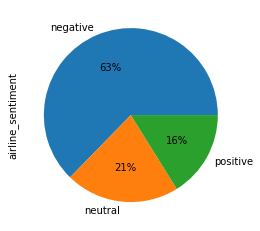

In [32]:
dataset["airline_sentiment"].value_counts().plot(kind='pie', autopct='%1.0f%%')

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

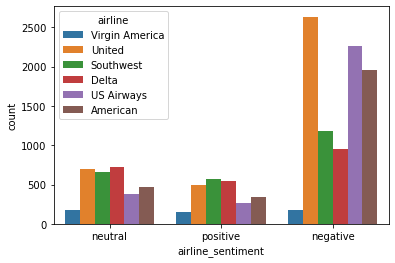

In [33]:
sns.countplot(x='airline_sentiment', data=dataset, hue = 'airline')

In [34]:
dataset.drop(labels=["tweet_id", "airline_sentiment_confidence", "negativereason", "negativereason_confidence", "airline", "name", "retweet_count", "tweet_created", "latitude", "longitude"],  axis=1, inplace=True)
dataset.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [35]:
data = dataset["airline_sentiment"]
data.head()

0     neutral
1    positive
2     neutral
3    negative
4    negative
Name: airline_sentiment, dtype: object

In [41]:
y = data.replace({'negative': -1, "neutral": 0, 'positive': 1})
dataset["airline_sentiment"] = y

y.head()

0    0
1    1
2    0
3   -1
4   -1
Name: airline_sentiment, dtype: int64

In [42]:
x = dataset["text"]
x.head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [43]:
english_stopwords = stopwords.words('english')
#base of english stopwords
stemmer = SnowballStemmer('english')
#stemming algorithm
regex = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
#regex for mentions and links in tweets


In [44]:
def preprocess(content, stem=False):
  content = re.sub(regex, ' ', str(content).lower()).strip()
  tokens = []
  for token in content.split():
    if token not in english_stopwords:
      tokens.append(stemmer.stem(token))
  return " ".join(tokens)

In [47]:
x = x.apply(lambda x: preprocess(x))
dataset["text"] = x

x.head()

0                                        dhepburn said
1                        plus ad commerci experi tacki
2                 today must mean need take anoth trip
3    realli aggress blast obnoxi entertain guest fa...
4                                 realli big bad thing
Name: text, dtype: object

In [48]:
dataset.head()

,airline_sentiment,text
0,0,dhepburn said
1,1,plus ad commerci experi tacki
2,0,today must mean need take anoth trip
3,-1,realli aggress blast obnoxi entertain guest fa...
4,-1,realli big bad thing


In [61]:
tfidf_vec = TfidfVectorizer(max_features=5000, min_df=50, max_df=0.8, stop_words=stopwords.words('english'))  
X= tfidf_vec.fit_transform(dataset["text"]).toarray()

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, dataset["airline_sentiment"], test_size=0.25, random_state=42)

In [65]:
rf_clf = RandomForestClassifier(n_estimators=250, random_state=0) 
rf_clf.fit(X_train, y_train) 
y_pred = rf_clf.predict(X_test)

In [66]:
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred)) 
print(accuracy_score(y_test,y_pred))

[[2120  146   74]
 [ 337  327   74]
 [ 162   71  349]]
              precision    recall  f1-score   support

          -1       0.81      0.91      0.86      2340
           0       0.60      0.44      0.51       738
           1       0.70      0.60      0.65       582

    accuracy                           0.76      3660
   macro avg       0.70      0.65      0.67      3660
weighted avg       0.75      0.76      0.75      3660

0.7639344262295082
